imports

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

pegando dataset, vetorizando e montando relação

In [ ]:
max=10000# levará somente elementos de maior preseça em consideração
treino = fetch_20newsgroups(subset='train', categories=['sci.space', 'rec.autos', 'talk.politics.misc', 'comp.graphics'] , remove=('headers', 'footers', 'quotes'))
teste=fetch_20newsgroups(subset='test', categories=['sci.space', 'rec.autos', 'talk.politics.misc', 'comp.graphics'] , remove=('headers', 'footers', 'quotes'))#teste de acurácia
vectorizer=TfidfVectorizer()#TF-IDF
Xtreino=vectorizer.fit_transform(treino.data)
Xteste=vectorizer.transform(teste.data)

SVD simplifica matriz

In [ ]:
k=2
svd=TruncatedSVD(n_components=k)
X_svd=svd.fit_transform(Xtreino)

teste comparando qualidades dos valores k svd

In [ ]:
listaK=[2,5,10,20,50,100,300,500]
acurácias=[]
for n in listaK:
  #reduzindo dimensão
  svd = TruncatedSVD(n_components=n)
  XtreinoSVD = svd.fit_transform(Xtreino)
  XTesteSVD = svd.transform(Xteste)
  #treinando modelo classificador
  classificador = LogisticRegression(max_iter=1000)
  classificador.fit(XtreinoSVD, treino.target)
  #pontuando
  resposta=classificador.predict(XTesteSVD)
  acurácias.append(accuracy_score(teste.target, resposta))


botar graficos bonitinhos

[0.4137004701141706, 0.6427132303559436, 0.7575554063129617, 0.7824042981867025, 0.7998656816655474, 0.8132975151108126, 0.8153122901276024, 0.8294157152451309]


Text(0.5, 0, 'Dimensão')

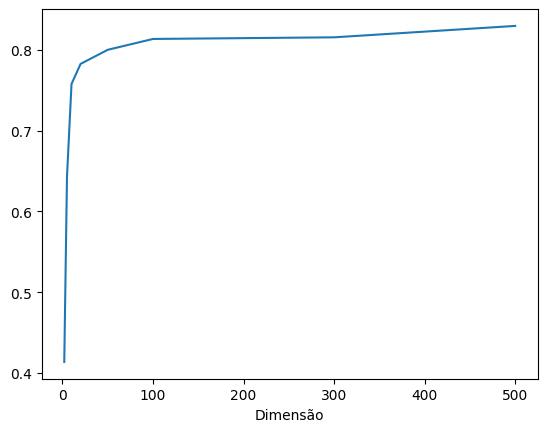

In [ ]:
print(acurácias)
plt.plot(listaK, acurácias)
plt.xlabel('Dimensão')
plt.ylabel('Acurácia')
plt.show()

In [ ]:
dataset = ['Algum tempo hesitei se devia abrir estas memórias pelo princípio ou pelo fim, isto é, se poria em primeiro lugar o meu nascimento ou a minha morte',
           'Suposto o uso vulgar seja começar pelo nascimento duas considerações me levaram a adotar diferente método: a primeira é que eu não sou propriamente um autor defunto, mas um defunto autor, para quem a campa foi outro berço; a segunda é que o escrito ficaria assim mais galante e mais novo',
            'Moisés, que também contou a sua morte, não a pôs no intróito, mas no cabo: diferença radical entre este livro e o Pentateuco',
            'Dito isto, expirei às duas horas da tarde de uma sexta-feira do mês de agosto de 1869, na minha bela chácara de Catumbi',
            'Tinha uns sessenta e quatro anos, rijos e prósperos, era solteiro, possuía cerca de trezentos contos e fui acompanhado ao cemitério por onze amigos',
            'Onze amigos!',
            'Verdade é que não houve cartas nem anúncios',
            'Acresce que chovia — peneirava uma chuvinha miúda, triste e constante, tão constante e tão triste, que levou um daqueles fiéis da última hora a intercalar esta engenhosa idéia no discurso que proferiu à beira de minha cova: — “Vós, que o conhecestes, meus senhores, vós podeis dizer comigo que a natureza parece estar chorando a perda irreparável de um dos mais belos caracteres que têm honrado a humanidade',
            'Este ar sombrio, estas gotas do céu, aquelas nuvens escuras que cobrem o azul como um crepe funéreo, tudo isso é a dor crua e má que lhe rói à Natureza as mais íntimas entranhas; tudo isso é um sublime louvor ao nosso ilustre finado']

In [ ]:
dataset = [
    'Algum tempo hesitei se devia abrir estas memórias pelo princípio ou pelo fim, isto é, se poria em primeiro lugar o meu nascimento ou a minha morte',
    'Suposto o uso vulgar seja começar pelo nascimento duas considerações me levaram a adotar diferente método: a primeira é que eu não sou propriamente um autor defunto, mas um defunto autor, para quem a campa foi outro berço; a segunda é que o escrito ficaria assim mais galante e mais novo',
    'Moisés, que também contou a sua morte, não a pôs no intróito, mas no cabo: diferença radical entre este livro e o Pentateuco',
    'Dito isto, expirei às duas horas da tarde de uma sexta-feira do mês de agosto de 1869, na minha bela chácara de Catumbi',
    'Tinha uns sessenta e quatro anos, rijos e prósperos, era solteiro, possuía cerca de trezentos contos e fui acompanhado ao cemitério por onze amigos',
    'Onze amigos!',
    'Verdade é que não houve cartas nem anúncios',
    'Acresce que chovia — peneirava uma chuvinha miúda, triste e constante, tão constante e tão triste, que levou um daqueles fiéis da última hora a intercalar esta engenhosa idéia no discurso que proferiu à beira de minha cova: — “Vós, que o conhecestes, meus senhores, vós podeis dizer comigo que a natureza parece estar chorando a perda irreparável de um dos mais belos caracteres que têm honrado a humanidade',
    'Este ar sombrio, estas gotas do céu, aquelas nuvens escuras que cobrem o azul como um crepe funéreo, tudo isso é a dor crua e má que lhe rói à Natureza as mais íntimas entranhas; tudo isso é um sublime louvor ao nosso ilustre finado',
    'Bom e fiel amigo! Não, não me arrependo das vinte apólices que lhe deixei',
    'E foi assim que cheguei à cláusula dos meus dias; foi assim que me encaminhei para o undiscovered country de Hamlet, sem as ânsias nem as dúvidas do moço príncipe, mas pausado e trôpego como quem se retira tarde do espetáculo',
    'Tarde e aborrecido',
    'Viram-me ir umas nove ou dez pessoas, entre elas três senhoras, minha irmã Sabina, casada com o Cotrim, a filha, — um lírio do vale, — e...',
    'Tenham paciência! daqui a pouco lhes direi quem era a terceira senhora',
    'Contentem-se de saber que essa anônima, ainda que não parenta, padeceu mais do que as parentas',
    'É verdade, padeceu mais',
    'Não digo que se carpisse, não digo que se deixasse rolar pelo chão, convulsa',
    'Nem o meu óbito era coisa altamente dramática...',
    'Um solteirão que expira aos sessenta e quatro anos, não parece que reúna em si todos os elementos de uma tragédia',
    'E dado que sim, o que menos convinha a essa anônima era aparentá-lo',
    'De pé, à cabeceira da cama, com os olhos estúpidos, a boca entreaberta, a triste senhora mal podia crer na minha extinção',
    '— “Morto! morto!” dizia consigo',
    'E a imaginação dela, como as cegonhas que um ilustre viajante viu desferirem o vôo desde o Ilisso às ribas africanas, sem embargo das ruínas e dos tempos, — a imaginação dessa senhora também voou por sobre os destroços presentes até às ribas de uma África juvenil...',
    'Deixá-la ir; lá iremos mais tarde; lá iremos quando eu me restituir aos primeiros anos',
    'Agora, quero morrer tranqüilamente, metodicamente, ouvindo os soluços das damas, as falas baixas dos homens, a chuva que tamborila nas folhas de tinhorão da chácara, e o som estrídulo de uma navalha que um amolador está afiando lá fora, à porta de um correeiro',
    'Juro-lhes que essa orquestra da morte foi muito menos triste do que podia parecer',
    'De certo ponto em diante chegou a ser deliciosa',
    'A vida estrebuchava-me no peito, com uns ímpetos de vaga marinha, esvaía-se-me a consciência, eu descia à imobilidade física e moral, e o corpo fazia-se-me planta, e pedra e lodo, e coisa nenhuma',
    'Morri de uma pneumonia; mas se lhe disser que foi menos a pneumonia, do que uma idéia grandiosa e útil, a causa da minha morte, é possível que o leitor me não creia, e todavia é verdade',
    'Vou expor-lhe sumariamente o caso',
    'Julgue-o por si mesmo',
    'Com efeito, um dia de manhã, estando a passear na chácara, pendurou-se-me uma idéia no trapézio que eu tinha no cérebro',
    'Uma vez pendurada, entrou a bracejar, a pernear, a fazer as mais arrojadas cabriolas de volatim, que é possível crer',
    'Eu deixei-me estar a contemplá-la',
    'Súbito, deu um grande salto, estendeu os braços e as pernas, até tomar a forma de um X: decifra-me ou devoro-te',
    'Essa idéia era nada menos que a invenção de um medicamento sublime, um emplastro anti-hipocondríaco, destinado a aliviar a nossa melancólica humanidade',
    'Na petição de privilégio que então redigi, chamei a atenção do governo para esse resultado, verdadeiramente cristão',
    'Todavia, não neguei aos amigos as vantagens pecuniárias que deviam resultar da distribuição de um produto de tamanhos e tão profundos efeitos',
    'Agora, porém, que estou cá do outro lado da vida, posso confessar tudo: o que me influiu principalmente foi o gosto de ver impressas nos jornais, mostradores, folhetos, esquinas, e enfim nas caixinhas do remédio, estas três palavras: Emplasto Brás Cubas',
    'Para que negá-lo?',
    'Eu tinha a paixão do arruído, do cartaz, do foguete de lágrimas',
    'Talvez os modestos me argúam esse defeito; fio, porém, que esse talento me hão de reconhecer os hábeis',
    'Assim, a minha idéia trazia duas faces, como as medalhas, uma virada para o público, outra para mim',
    'De um lado, filantropia e lucro; de outro lado, sede de nomeada',
    'Digamos: — amor da glória',
    'Um tio meu, cônego de prebenda inteira, costumava dizer que o amor da glória temporal era a perdição das almas, que só devem cobiçar a glória eterna',
    'Ao que retorquia outro tio, oficial de um dos antigos terços de infantaria, que o amor da glória era a coisa mais verdadeiramente humana que há no homem, e, conseguintemente, a sua mais genuína feição',
    'Decida o leitor entre o militar e o cônego; eu volto ao emplasto',
    'Mas, já que falei nos meus dois tios, deixem-me fazer aqui um curto esboço genealógico',
    'O fundador da minha família foi um certo Damião Cubas, que floresceu na primeira metade do século XVIII',
    'Era tanoeiro de ofício, natural do Rio de Janeiro, onde teria morrido na penúria e na obscuridade, se somente exercesse a tanoaria',
    'Mas não; fez-se lavrador, plantou, colheu, permutou o seu produto por boas e honradas patacas, até que morreu, deixando grosso cabedal a um filho, licenciado Luís Cubas',
    'Neste rapaz é que verdadeiramente começa a série de meus avós — dos avós que a minha família sempre confessou, — porque o Damião Cubas era afinal de contas um tanoeiro, e talvez mau tanoeiro, ao passo que o Luís Cubas estudou em Coimbra, primou no Estado, e foi um dos amigos particulares do vice-rei Conde da Cunha',
    'Como este apelido de Cubas lhe cheirasse excessivamente a tanoaria, alegava meu pai, bisneto de Damião, que o dito apelido fora dado a um cavaleiro, herói nas jornadas da África, em prêmio da façanha que praticou, arrebatando trezentas cubas aos mouros',
    'Meu pai era homem de imaginação; escapou à tanoaria nas asas de um calembour',
    'Era um bom caráter, meu pai, varão digno e leal como poucos',
    'Tinha, é verdade, uns fumos de pacholice; mas quem não é um pouco pachola nesse mundo?',
    'Releva notar que ele não recorreu à inventiva senão depois de experimentar a falsificação',
    'Primeiramente, entroncou-se na família daquele meu famoso homônimo, o capitão-mor, Brás Cubas, que fundou a vila de São Vicente, onde morreu em 1592, e por esse motivo é que me deu o nome de Brás',
    'Opôs-se-lhe, porém, a família do capitão-mor, e foi então que ele imaginou as trezentas cubas mouriscas',
    'Vivem ainda alguns membros de minha família, minha sobrinha Venância, por exemplo, o lírio do vale, que é a flor das damas do seu tempo',
    'Vive o pai, o Cotrim, um sujeito que...',
    'Mas não antecipemos os sucessos; acabemos de uma vez com o nosso emplasto'
]


In [ ]:
dataset = [line.lower() for line in dataset]
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(dataset)

lsa = TruncatedSVD(n_components = 4, n_iter= 100)

lsa.fit(x)

rowl = lsa.components_[0]


In [ ]:
terms = vectorizer.get_feature_names_out()
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms, comp)
    sortedTerms = sorted(componentTerms, key = lambda x:x[1], reverse = True)
    sortedTerms = sortedTerms [:10]
    print ("n Concept", i, ":")
    for term in sortedTerms:
        print(term)

n Concept 0 :
('que', np.float64(0.41912777830930725))
('de', np.float64(0.3237051050093024))
('um', np.float64(0.225576864519942))
('do', np.float64(0.21635256446459916))
('não', np.float64(0.17406333451627506))
('da', np.float64(0.1623924501458756))
('se', np.float64(0.15257515423583767))
('me', np.float64(0.13806377456043017))
('uma', np.float64(0.13247089823529876))
('mais', np.float64(0.12507869882027478))
n Concept 1 :
('não', np.float64(0.2689150814260192))
('verdade', np.float64(0.2111541392763124))
('padeceu', np.float64(0.1630699021723848))
('se', np.float64(0.1535568658961462))
('me', np.float64(0.13913024421178444))
('mais', np.float64(0.1333823770686114))
('que', np.float64(0.11840675416906182))
('mas', np.float64(0.11812585935740362))
('digo', np.float64(0.095911470421975))
('para', np.float64(0.09107996322841394))
n Concept 2 :
('do', np.float64(0.2749062632224228))
('na', np.float64(0.1804624208122924))
('minha', np.float64(0.14892375390097085))
('me', np.float64(0.1487